In [1]:
""" data preprocess """
import pandas as pd

data = pd.read_csv('zoo.data',sep=',',header=None)
label = data[17]
data = data.drop([0,17],axis=1)
data.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000


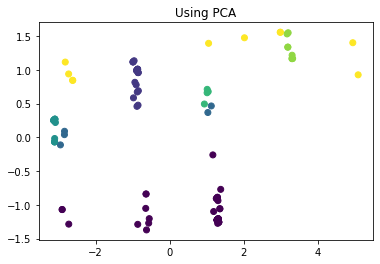

In [2]:
""" PCA """
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
data_new = pca.transform(data)
plt.scatter(data_new[:, 0], data_new[:, 1],marker='o',c=label)
plt.title('Using PCA')
plt.show()

In [3]:
""" MDS """
import math
# infer the importance of different attributes by Information Gain
for column in data:
    result = {}
    sum = 0
    IG = 0
    for row in data[column]:
        if not result.__contains__(row):
            result[row] = 1
        else:
            result[row] = result[row]+1
        sum += 1
    for item in result:
        pi = result[item]/sum
        IG += -pi*math.log2(pi)
    data[column] *= IG
data.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.418944,0.142168,0.572163,0.395516,0.187976,0.334937,0.549702,0.584988,0.555658,0.584150,0.031634,0.110052,5.779246,0.611017,0.071294,0.430423
std,0.488986,0.287535,0.485154,0.480849,0.338379,0.452303,0.495222,0.476072,0.260055,0.300781,0.108396,0.245853,4.135521,0.361552,0.186415,0.492342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.676163,0.737490,0.000000,0.000000,4.067623,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.979466,0.000000,0.000000,0.000000,0.991427,0.968587,0.676163,0.737490,0.000000,0.000000,8.135245,0.822837,0.000000,0.000000
75%,0.984030,0.000000,0.979466,0.974320,0.000000,0.939685,0.991427,0.968587,0.676163,0.737490,0.000000,0.000000,8.135245,0.822837,0.000000,0.988016
max,0.984030,0.717950,0.979466,0.974320,0.791066,0.939685,0.991427,0.968587,0.676163,0.737490,0.399382,0.653840,16.270491,0.822837,0.553898,0.988016


Text(0.5, 1.0, 'Using My MDS')

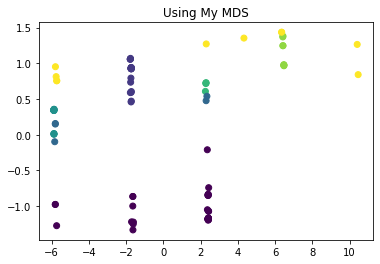

In [4]:

#compute pair-wise distances beetween the species taking into account the attribute importance
import numpy as np
import matplotlib.pyplot as plt
 
class MyMDS:
    def __init__(self,n_components):
        self.n_components=n_components
    
    def fit(self,data):
        m,n=data.shape
        dist=np.zeros((m,m))
        disti=np.zeros(m)
        distj=np.zeros(m)
        B=np.zeros((m,m))
        for i in range(m):
            dist[i]=np.sum(np.square(data[i]-data),axis=1).reshape(1,m)
        for i in range(m):
            disti[i]=np.mean(dist[i,:])
            distj[i]=np.mean(dist[:,i])
        distij=np.mean(dist)
        for i in range(m):
            for j in range(m):
                B[i,j] = -0.5*(dist[i,j] - disti[i] - distj[j] + distij)
        lamda,V=np.linalg.eigh(B)
        index=np.argsort(-lamda)[:self.n_components]
        diag_lamda=np.sqrt(np.diag(-np.sort(-lamda)[:self.n_components]))
        V_selected=V[:,index]
        Z=V_selected.dot(diag_lamda)
        return Z
MDS = MyMDS(2)
MDS_fit = MDS.fit(data.values)
plt.scatter(MDS_fit[:,0],MDS_fit[:,1],c=label)
plt.title('Using My MDS')

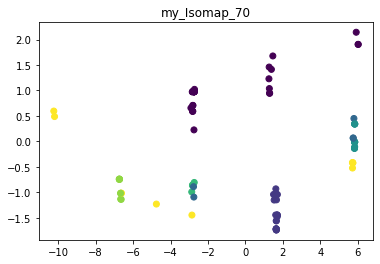

In [5]:
""" Isomap """

def floyd(D,n_neighbors=15):    #k近邻
    Max = np.max(D)*1000
    n1,n2 = D.shape
    k = n_neighbors
    D1 = np.ones((n1,n1))*Max
    D_arg = np.argsort(D,axis=1) #返回从小到大的索引值，每一列进行排序
    for i in range(n1):
        D1[i,D_arg[i,0:k+1]] = D[i,D_arg[i,0:k+1]]  #找出与i最近的k个数
    for k in range(n1):
        for i in range(n1):
            for j in range(n1):
                if D1[i,k]+D1[k,j]<D1[i,j]:
                    D1[i,j] = D1[i,k]+D1[k,j]  #需再次理解 
    return D1

def cal_pairwise_dist(x):          #任意两点之间距离的平方
    '''计算pairwise 距离, x是matrix
    (a-b)^2 = a^2 + b^2 - 2*a*b
    '''
    sum_x = np.sum(np.square(x), 1)   #square计算各元素平方      1 按行相加  0按列相加
    dist = np.add(np.add(-2 * np.dot(x, x.T), sum_x).T, sum_x)
    #返回任意两个点之间距离的平方
    return dist

def my_mds(dist, n_dims):    #距离矩阵分解，得到降维之后的数据
    # dist (n_samples, n_samples)
    dist = dist**2
    n = dist.shape[0]
    T1 = np.ones((n,n))*np.sum(dist)/n**2
    T2 = np.sum(dist, axis = 1)/n
    T3 = np.sum(dist, axis = 0)/n

    B = -(T1 - T2 - T3 + dist)/2

    eig_val, eig_vector = np.linalg.eig(B)
    index_ = np.argsort(-eig_val)[:n_dims]
    picked_eig_val = eig_val[index_].real
    picked_eig_vector = eig_vector[:, index_]

    return picked_eig_vector*picked_eig_val**(0.5)

def my_Isomap(data,n=2,n_neighbors=30):
    D = cal_pairwise_dist(data)
    D[D < 0] = 0
    D = D**0.5       #距离矩阵
    D_floyd=floyd(D, n_neighbors)     #k近邻之后得到的距离矩阵
    data_n = my_mds(D_floyd, n_dims=n)
    return data_n

def scatter_3d(X, y):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.hot)
    ax.view_init(10, -70)
    ax.set_xlabel("$x_1$", fontsize=18)
    ax.set_ylabel("$x_2$", fontsize=18)
    ax.set_zlabel("$x_3$", fontsize=18)
    plt.show()

N_NEIGHBORS = 70

Isomap = my_Isomap(data.values, 2, N_NEIGHBORS)    

plt.title("my_Isomap_{}".format(N_NEIGHBORS))
plt.scatter(Isomap[:, 0], Isomap[:, 1], c = label)
